# Linear Regression using Tensorflow

##  Introduction to Deep Learning

<img style="float: left;" width="600" src="images/deep_learning.png">

### What is Deep Learning?

* A family of machine learning methods based on artificial neural networks (ANNs) 
* ANNs with multiple layers between the input and output layers
* Learning can be supervised, semi-supervised or unsupervised
* Applications: 
    * computer vision
    * speech recognition
    * natural language processing
    * audio recognition
    * bioinformatics


<img style="float: left;" width="500" src="images/artificial_neural_network.png">

### Artificial Neural Networks (ANNs)

* Computing systems inspired by the biological neural networks that constitute animal brains
* An ANN is based on a collection of connected units, called artificial neurons
* Each connection can transmit a signal from one artificial neuron to another, like the synapses in biological brains
* Artificial neurons typically have an associated weight
* Learning consists in adjusting the weights in order to optimize some function




<img style="float: left;" width="400" src="images/artificial_neural_network_learning.jpeg">

### Tensorflow

* **TensorFlow** is an open source software library for numerical computation using data-flow graphs
* It was developed by the Google Brain team for internal Google use
* Its initial purpose was for machine learning and deep neural networks research at Google
* However, the system is general enough to be applicable in a wide variety of other domains
* In our classes, it will the de framework used for ANNs creation and learning
* Alternatives:
    * PyTorch - generally a better choice for fast development of projects that need to be up and running in a short time
    * CNTK - the Microsoft Cognitive Toolkit focuses most on creating deep learning neural networks
    * Apache MXNet - adopted by Amazon as the premier deep learning framework on AWS


<img style="float: left;" width="200" src="images/tensorflow.png">

## Linear Regression example

* In this example we will use Gradient Descent to fit the neural network weights to fit into a non linear function
* This example matches the non-linear case explained in the last lecture

In [1]:
%matplotlib inline
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

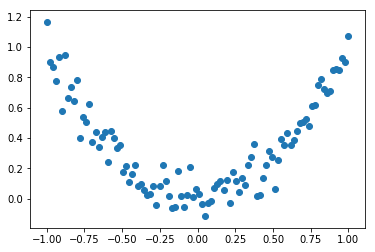

In [2]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot data
plt.scatter(x, y)

In [3]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer. relu = Rectified Linear Unit
output = tf.layers.dense(l1, 1)                     # output layer

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [4]:
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


### Loss function

* A loss function or cost function is a function that maps an event to some "cost" associated with the event
* The idea is to update the neural network weights in order to minimize the loss
* Here, the loss is given by the mean squared error:

\begin{equation}  \mathcal{L}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}{\Big(y_i - \hat{y_i}\Big)^2} \end{equation}
where \begin{equation}  \hat{y} = f(x, \theta)\end{equation}
with $\theta$ = vector of ANN weights
* Gradient Descent can be used for the loss minimization

<img style="float: left;" width="400" src="images/gradient_descent.png">

In [5]:
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

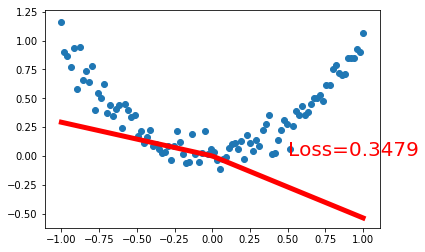

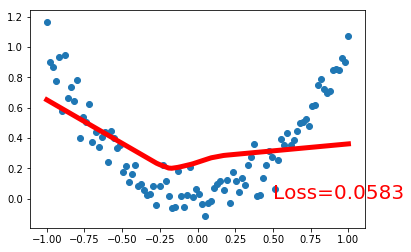

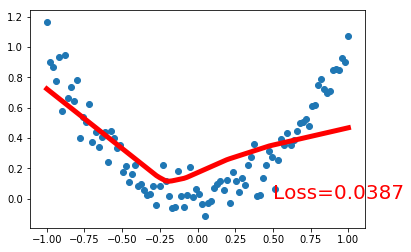

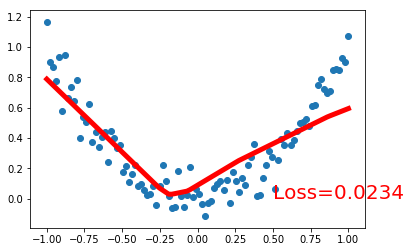

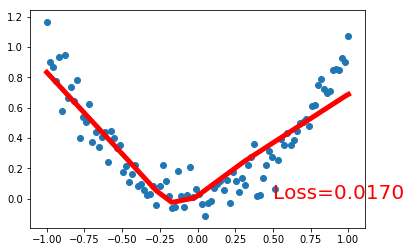

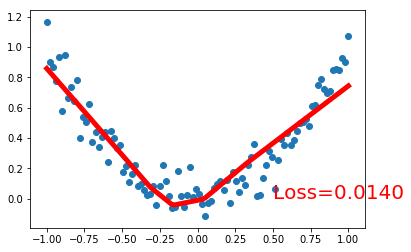

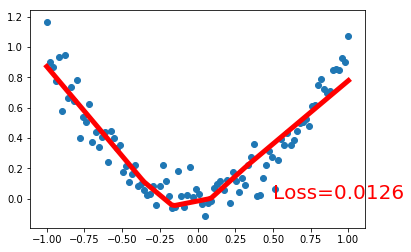

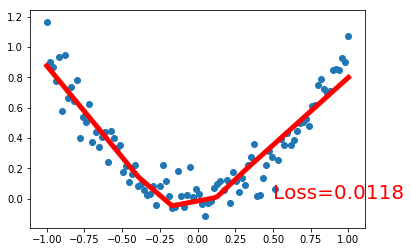

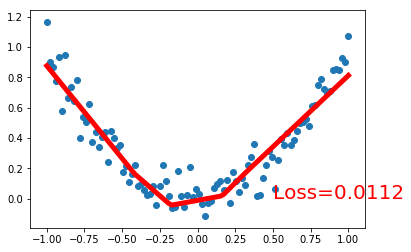

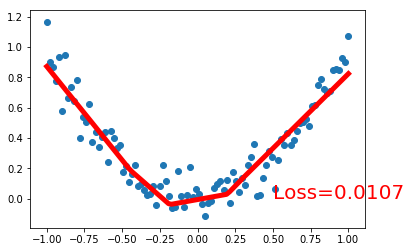

In [6]:
for step in range(100):
   # train and net output
   _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
   if step % 10 == 0: #plot for every 10 steps
       # plot and show learning process
       plt.cla()
       plt.scatter(x, y)
       plt.plot(x, pred, 'r-', lw=5)
       plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
       plt.pause(0.2)

plt.ioff()